## Importing Libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('healthcare_dataset.csv')

In [3]:
df.head(1)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal


In [4]:
df['Test Results'].value_counts().index

Index(['Abnormal', 'Normal', 'Inconclusive'], dtype='object', name='Test Results')

## Data Set Overview

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [6]:
# Summary

print(df.describe())

                Age  Billing Amount   Room Number
count  55500.000000    55500.000000  55500.000000
mean      51.539459    25539.316097    301.134829
std       19.602454    14211.454431    115.243069
min       13.000000    -2008.492140    101.000000
25%       35.000000    13241.224652    202.000000
50%       52.000000    25538.069376    302.000000
75%       68.000000    37820.508436    401.000000
max       89.000000    52764.276736    500.000000


In [7]:
# Missing Values

print(df.isnull().sum())

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [8]:
df['Test Results'].unique()

array(['Normal', 'Inconclusive', 'Abnormal'], dtype=object)

In [9]:
# Unique Values of Each Column

for col in df.columns:
    print(f"{col}: {df[col].unique()}")

Name: ['Bobby JacksOn' 'LesLie TErRy' 'DaNnY sMitH' ... 'LiSa sIMPsoN'
 'RoGER farRELl' 'kaTheRIne WeBSTer']
Age: [30 62 76 28 43 36 21 20 82 58 72 38 75 68 44 46 63 34 67 48 59 73 51 23
 78 25 33 26 70 57 74 81 49 65 31 22 77 42 24 84 55 40 83 18 27 19 29 61
 80 60 35 79 53 69 47 85 52 37 50 32 54 45 66 39 56 64 71 41 88 17 87 86
 15 16 13 14 89]
Gender: ['Male' 'Female']
Blood Type: ['B-' 'A+' 'A-' 'O+' 'AB+' 'AB-' 'B+' 'O-']
Medical Condition: ['Cancer' 'Obesity' 'Diabetes' 'Asthma' 'Hypertension' 'Arthritis']
Date of Admission: ['2024-01-31' '2019-08-20' '2022-09-22' ... '2019-05-31' '2023-10-12'
 '2021-03-14']
Doctor: ['Matthew Smith' 'Samantha Davies' 'Tiffany Mitchell' ... 'Deborah Sutton'
 'Mary Bartlett' 'Alec May']
Hospital: ['Sons and Miller' 'Kim Inc' 'Cook PLC' ... 'Guzman Jones and Graves,'
 'and Williams, Brown Mckenzie' 'Moreno Murphy, Griffith and']
Insurance Provider: ['Blue Cross' 'Medicare' 'Aetna' 'UnitedHealthcare' 'Cigna']
Billing Amount: [18856.28130598 33643.32

In [10]:
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df['Num of Days'] = (df['Discharge Date']-df['Date of Admission']).dt.days
df =df.drop(columns=['Name','Date of Admission','Discharge Date'],axis=1)

In [11]:
df

,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Test Results,Num of Days
0,30,Male,B-,Cancer,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,Paracetamol,Normal,2
1,62,Male,A+,Obesity,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,Ibuprofen,Inconclusive,6
2,76,Female,A-,Obesity,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,Aspirin,Normal,15
3,28,Female,O+,Diabetes,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,Ibuprofen,Abnormal,30
4,43,Female,AB+,Cancer,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,Penicillin,Abnormal,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,42,Female,O+,Asthma,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,Penicillin,Abnormal,30
55496,61,Female,AB-,Obesity,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,Aspirin,Normal,9
55497,38,Female,B+,Hypertension,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,Ibuprofen,Abnormal,28
55498,43,Male,O-,Arthritis,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,Ibuprofen,Abnormal,6


In [12]:
df.duplicated().sum()

np.int64(534)

In [13]:
df = df.drop_duplicates()

In [14]:
df.shape

(54966, 13)

## EDA

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

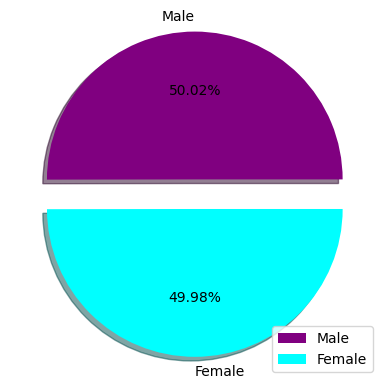

In [16]:
plt.pie(df['Gender'].value_counts(normalize=True)*100 , shadow=True , colors=['purple' , 'cyan'] ,explode=[.1,.1],labels= ['Male' , 'Female'], autopct='%0.2f%%')
plt.legend()
plt.show()

<Figure size 1200x1000 with 0 Axes>

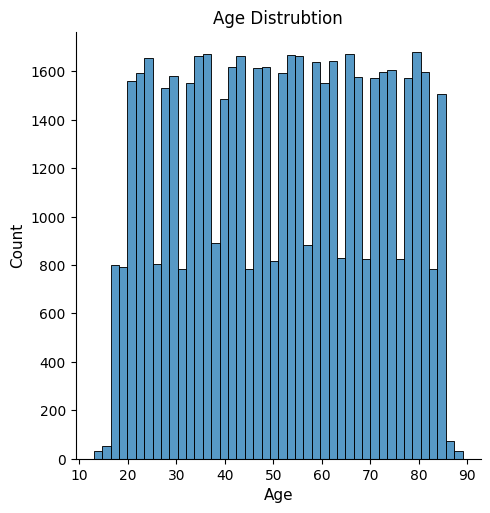

In [17]:
# Age Distribution

plt.figure(figsize=(12,10))
sns.displot(df['Age'])
plt.title('Age Distrubtion',fontsize=12)
plt.xlabel('Age',fontsize=11)
plt.ylabel('Count',fontsize=11)
plt.show()

In [18]:
df.columns

Index(['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Doctor',
       'Hospital', 'Insurance Provider', 'Billing Amount', 'Room Number',
       'Admission Type', 'Medication', 'Test Results', 'Num of Days'],
      dtype='object')

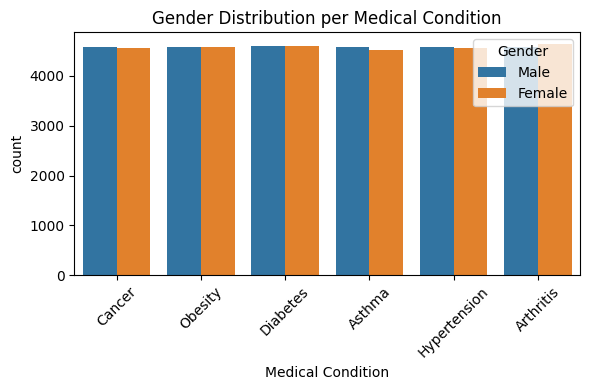

In [19]:
# Gender Distribution

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Medical Condition', hue='Gender')
plt.title('Gender Distribution per Medical Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

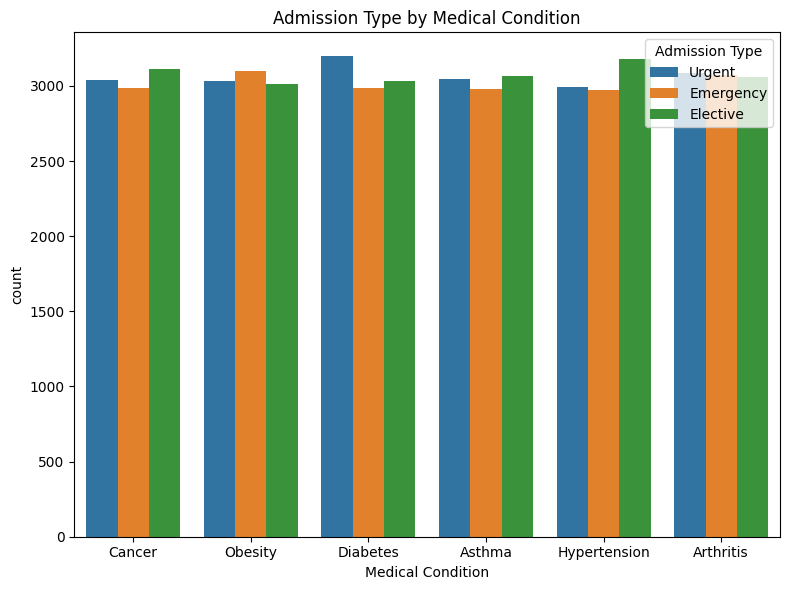

In [20]:
# Admission Type

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Medical Condition', hue='Admission Type')
plt.title('Admission Type by Medical Condition')
plt.tight_layout()
plt.show()

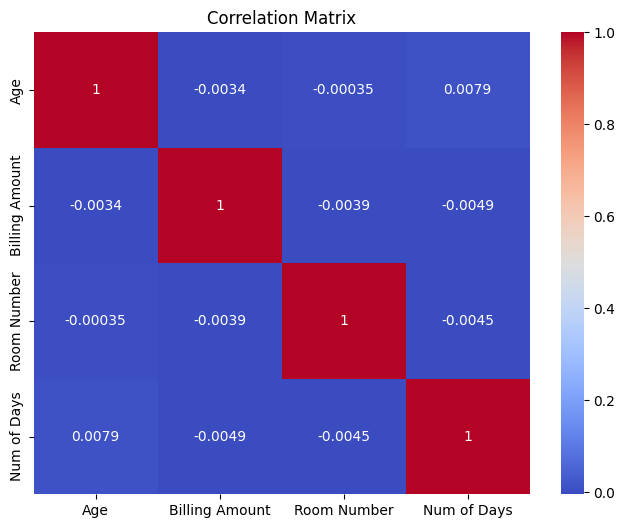

In [21]:
# Corelation Matrix

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [22]:
df

,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Test Results,Num of Days
0,30,Male,B-,Cancer,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,Paracetamol,Normal,2
1,62,Male,A+,Obesity,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,Ibuprofen,Inconclusive,6
2,76,Female,A-,Obesity,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,Aspirin,Normal,15
3,28,Female,O+,Diabetes,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,Ibuprofen,Abnormal,30
4,43,Female,AB+,Cancer,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,Penicillin,Abnormal,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55495,42,Female,O+,Asthma,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,Penicillin,Abnormal,30
55496,61,Female,AB-,Obesity,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,Aspirin,Normal,9
55497,38,Female,B+,Hypertension,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,Ibuprofen,Abnormal,28
55498,43,Male,O-,Arthritis,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,Ibuprofen,Abnormal,6


## Machine Learning Modeling

In [23]:
import joblib
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

In [24]:

df_encoded = df_encoded.drop_duplicates()
df_encoded.shape
# Create target from Num of Days
def stay_category(days):
    if days <= 2:
        return 0  # Short stay
    elif days <= 6:
        return 1  # Medium stay
    else:
        return 2  # Long stay

df_encoded['Stay_Category'] = df_encoded['Num of Days'].apply(stay_category)


In [25]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(['Num of Days', 'Stay_Category', 'Room Number'], axis=1)
y = df_encoded['Stay_Category']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [26]:
from category_encoders import TargetEncoder

target_encode_cols = ['Doctor', 'Hospital']
te = TargetEncoder()
X_train[target_encode_cols] = te.fit_transform(X_train[target_encode_cols], y_train)

In [27]:
joblib.dump(te, "target_encoder.pkl")

['target_encoder.pkl']

In [28]:
df_encoded.head()

,Age,Gender,Blood Type,Medical Condition,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Medication,Test Results,Num of Days,Stay_Category
0,30,Male,B-,Cancer,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,Paracetamol,Normal,2,0
1,62,Male,A+,Obesity,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,Ibuprofen,Inconclusive,6,1
2,76,Female,A-,Obesity,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,Aspirin,Normal,15,2
3,28,Female,O+,Diabetes,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,Ibuprofen,Abnormal,30,2
4,43,Female,AB+,Cancer,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,Penicillin,Abnormal,20,2


In [29]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# gender_col = ['Gender']
categorical_cols = X_train.select_dtypes(include='object').columns
ohe = OneHotEncoder(sparse_output=False,drop='first', handle_unknown='ignore')
ohe_array = ohe.fit_transform(X_train[categorical_cols])
ohe_columns = ohe.get_feature_names_out(categorical_cols)
ohe_df_train = pd.DataFrame(ohe_array, columns=ohe_columns, index=X_train.index)

# # Drop original categorical and merge
X_train = X_train.drop(columns=categorical_cols)
X_train = pd.concat([X_train, ohe_df_train], axis=1)

In [30]:
joblib.dump(ohe, "ohe.pkl")

['ohe.pkl']

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = ['Age', 'Billing Amount'] 
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

In [32]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [33]:
joblib.dump(X_train.columns.tolist(), "train_columns.pkl")

['train_columns.pkl']

In [34]:
# Scale

# Target Encode
X_test[target_encode_cols] = te.transform(X_test[target_encode_cols])

X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# One-Hot Encode
ohe_array_test = ohe.transform(X_test[categorical_cols])
ohe_df_test = pd.DataFrame(ohe_array_test, columns=ohe_columns, index=X_test.index)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


Classification: Train models to classify patients into short, medium, or long hospital stay using features like age, medical condition, test results, etc.

In [35]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train the model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict
y_pred = logreg.predict(X_test)

# Evaluation
print("Logistic Regression Results:")
print(classification_report(y_test, y_pred))

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.95      0.13      0.22       728
           1       0.33      0.19      0.24      1477
           2       0.82      0.94      0.88      8789

    accuracy                           0.79     10994
   macro avg       0.70      0.42      0.45     10994
weighted avg       0.77      0.79      0.75     10994



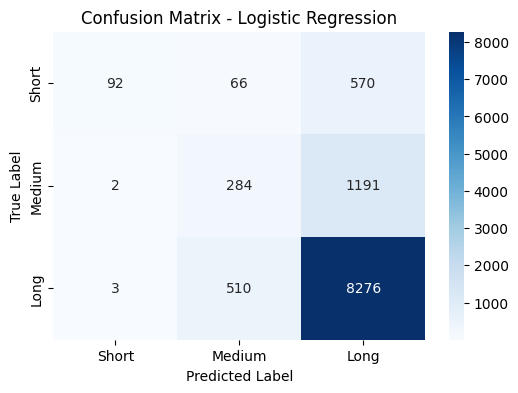

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it using Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Short', 'Medium', 'Long'], yticklabels=['Short', 'Medium', 'Long'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [37]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Results:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Results:
              precision    recall  f1-score   support

           0       0.46      0.17      0.25       728
           1       0.19      0.42      0.26      1477
           2       0.84      0.70      0.76      8789

    accuracy                           0.63     10994
   macro avg       0.50      0.43      0.43     10994
weighted avg       0.72      0.63      0.66     10994



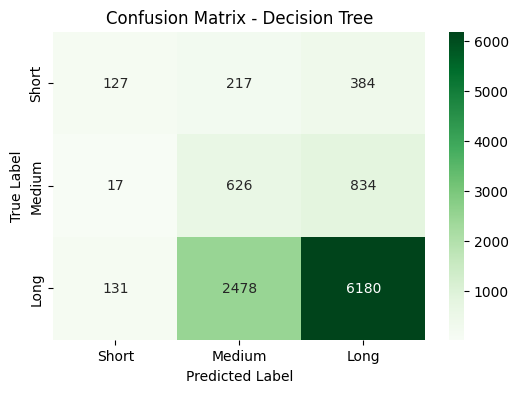

In [38]:
# Plot Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens', xticklabels=['Short', 'Medium', 'Long'], yticklabels=['Short', 'Medium', 'Long'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [39]:
# Random Forest Classifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf_class = rf_classifier.predict(X_test)


print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf_class))

Random Forest Results:
              precision    recall  f1-score   support

           0       0.49      0.17      0.25       728
           1       0.34      0.20      0.26      1477
           2       0.83      0.93      0.87      8789

    accuracy                           0.78     10994
   macro avg       0.55      0.43      0.46     10994
weighted avg       0.74      0.78      0.75     10994



In [40]:
joblib.dump(rf_classifier, 'rf_classifier.pkl')

['rf_classifier.pkl']

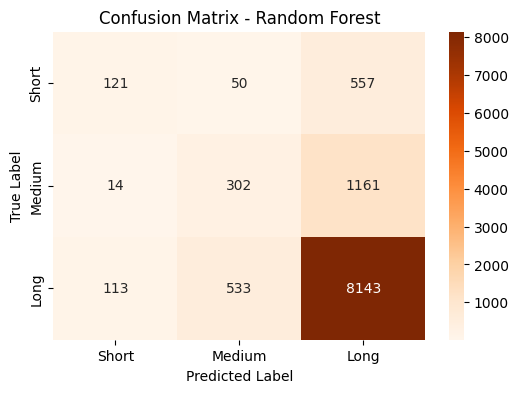

In [41]:
# Plot Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf_class)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges', xticklabels=['Short', 'Medium', 'Long'], yticklabels=['Short', 'Medium', 'Long'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest')
plt.show()

### Model Comparisions

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

def evaluate_model(name, y_true, y_pred):
    return {
        'Model': name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted', zero_division=0),
        'Recall': recall_score(y_true, y_pred, average='weighted', zero_division=0),
        'F1 Score': f1_score(y_true, y_pred, average='weighted', zero_division=0)
    }

In [43]:
results = [
    evaluate_model('Logistic Regression', y_test, y_pred),
    evaluate_model('Decision Tree', y_test, y_pred_dt),
    evaluate_model('Random Forest', y_test, y_pred_rf_class)
]

results_df = pd.DataFrame(results)
print(results_df)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.786975   0.766344  0.786975  0.750293
1        Decision Tree  0.630617   0.723722  0.630617  0.662256
2        Random Forest  0.779152   0.738310  0.779152  0.748876


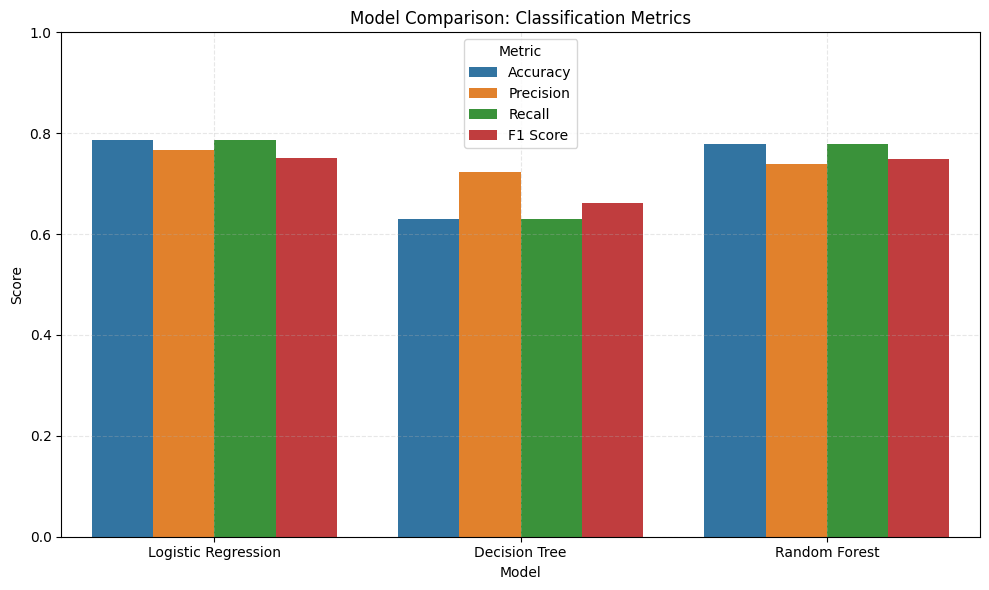

In [44]:
# Convert wide to long format
results_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Score', hue='Metric', data=results_melted)

plt.title('Model Comparison: Classification Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(title='Metric')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

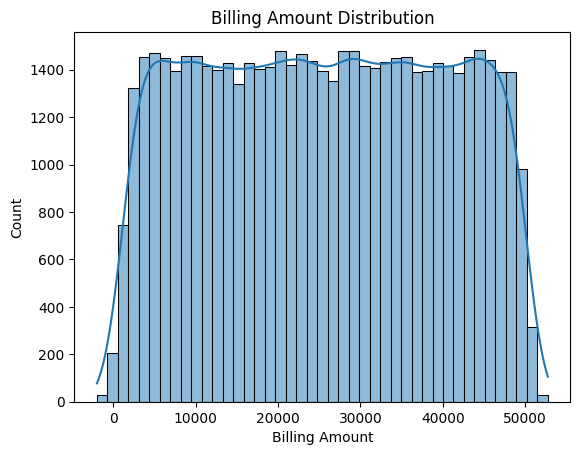

In [45]:
# Distribution of billing

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_encoded['Billing Amount'], kde=True)
plt.title("Billing Amount Distribution")
plt.show()

## Clustering


Patient Clustering: The goal is to find meaningful patterns or clusters in the data based on medical features.

In [46]:
features_for_clustering = [
    'Age',
    'Gender_Male',
    'Blood Type_A-', 'Blood Type_AB+', 'Blood Type_AB-', 
    'Blood Type_B+', 'Blood Type_B-', 'Blood Type_O+', 'Blood Type_O-',
    'Medical Condition_Asthma', 'Medical Condition_Cancer', 
    'Medical Condition_Diabetes', 'Medical Condition_Hypertension', 
    'Medical Condition_Obesity',
    'Admission Type_Emergency', 'Admission Type_Urgent', 
    'Medication_Ibuprofen', 'Medication_Lipitor', 'Medication_Paracetamol', 'Medication_Penicillin',
    'Test Results_Inconclusive', 'Test Results_Normal'
]

X_cluster = X_train[features_for_clustering]


In [47]:
X_train.head(1).to_dict(orient="records")

[{'Age': -0.13030446870379372,
  'Doctor': 1.768006505932295,
  'Hospital': 1.768006505932295,
  'Billing Amount': -1.4104236908012686,
  'Gender_Male': 0.0,
  'Blood Type_A-': 0.0,
  'Blood Type_AB+': 0.0,
  'Blood Type_AB-': 0.0,
  'Blood Type_B+': 0.0,
  'Blood Type_B-': 0.0,
  'Blood Type_O+': 0.0,
  'Blood Type_O-': 1.0,
  'Medical Condition_Asthma': 1.0,
  'Medical Condition_Cancer': 0.0,
  'Medical Condition_Diabetes': 0.0,
  'Medical Condition_Hypertension': 0.0,
  'Medical Condition_Obesity': 0.0,
  'Insurance Provider_Blue Cross': 0.0,
  'Insurance Provider_Cigna': 0.0,
  'Insurance Provider_Medicare': 0.0,
  'Insurance Provider_UnitedHealthcare': 0.0,
  'Admission Type_Emergency': 0.0,
  'Admission Type_Urgent': 1.0,
  'Medication_Ibuprofen': 0.0,
  'Medication_Lipitor': 0.0,
  'Medication_Paracetamol': 0.0,
  'Medication_Penicillin': 0.0,
  'Test Results_Inconclusive': 0.0,
  'Test Results_Normal': 0.0}]

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

In [49]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
X_train['Patient Cluster'] = clusters

In [50]:
cluster_summary = X_train.groupby('Patient Cluster')[features_for_clustering].mean()
print(cluster_summary)

                      Age  Gender_Male  Blood Type_A-  Blood Type_AB+  \
Patient Cluster                                                         
0                0.010282     0.504789       0.000000        0.089603   
1               -0.004084     0.493006       0.000000        0.199760   
2                0.001136     0.500098       0.546161        0.095276   
3               -0.007261     0.503098       0.000000        0.000000   

                 Blood Type_AB-  Blood Type_B+  Blood Type_B-  Blood Type_O+  \
Patient Cluster                                                                
0                      0.092796       0.546099            0.0       0.089104   
1                      0.200962       0.000000            0.0       0.199377   
2                      0.087697       0.000000            0.0       0.091634   
3                      0.000000       0.000000            1.0       0.000000   

                 Blood Type_O-  Medical Condition_Asthma  ...  \
Patient Cluster

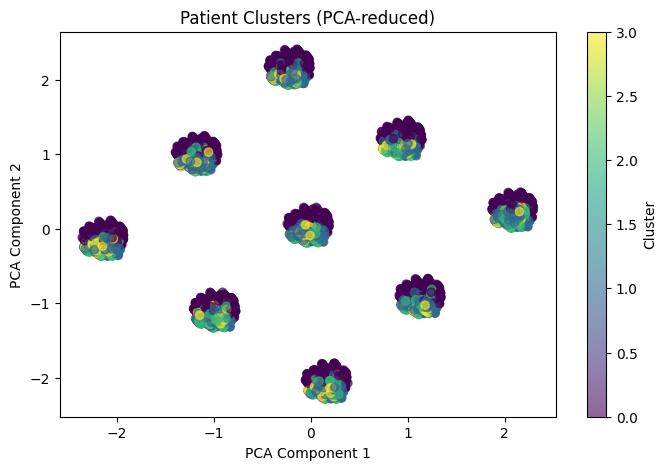

In [51]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title("Patient Clusters (PCA-reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()

In [52]:
print(X_train['Patient Cluster'].value_counts())

Patient Cluster
1    18302
2    10160
0    10022
3     5488
Name: count, dtype: int64


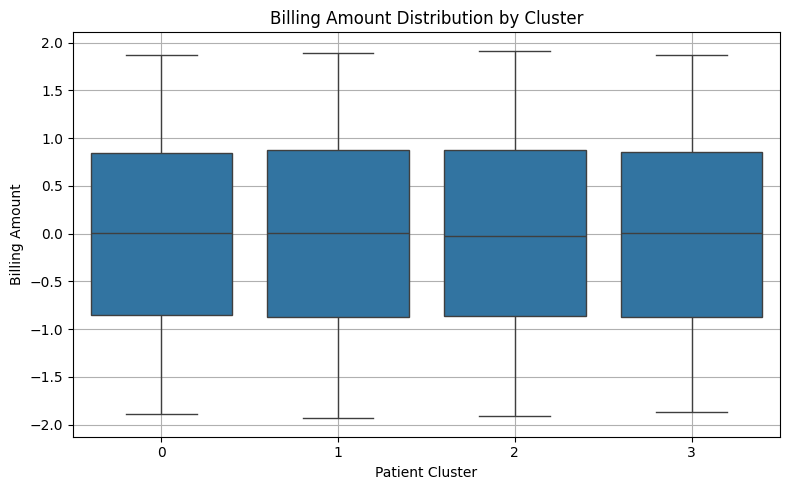

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='Patient Cluster', y='Billing Amount', data=X_train)
plt.title("Billing Amount Distribution by Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()

In [54]:
import json

unique_merchants = df["Hospital"].unique()
merchant_list = list(unique_merchants)

with open("hospital.json", "w") as f:
    json.dump(merchant_list, f, indent=4)


import json

unique_merchants = df["Doctor"].unique()
merchant_list = list(unique_merchants)

with open("doctor.json", "w") as f:
    json.dump(merchant_list, f, indent=4)


In [ ]:
!streamlit run stay_category_pred_streamlit.py